# Mushroom Classification
## Via supervised and unsupervised learning

### Variable Dictionary

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

## Part 0: Data Treatment

In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#import scikit-learn as sk


# Load dataset
from sklearn.datasets import load_wine
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [20]:
#check for missing values
data.isnull().sum()


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

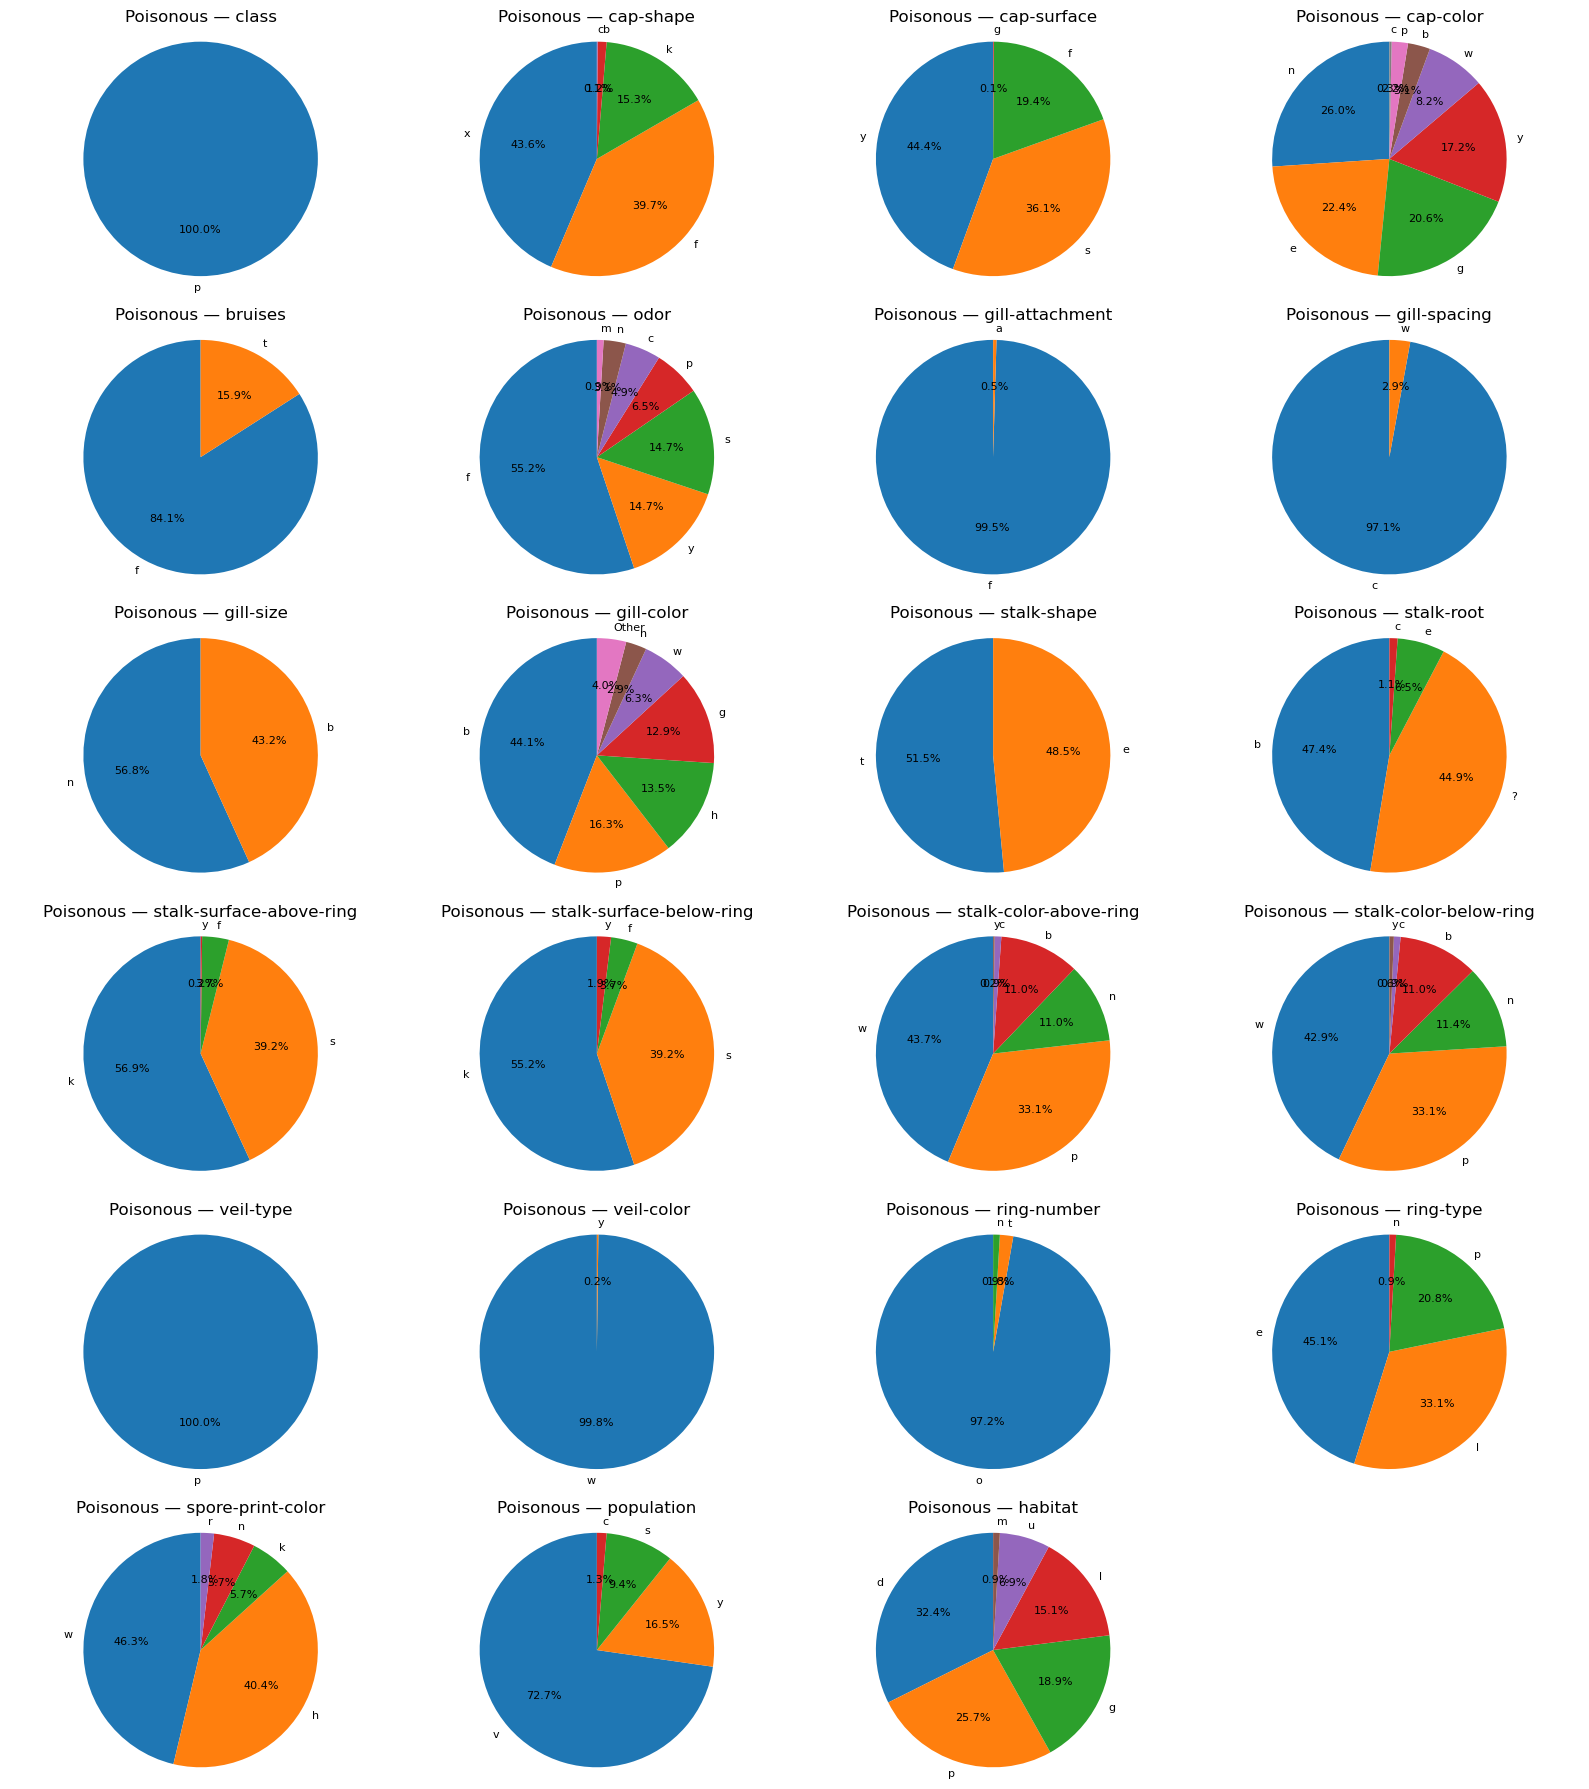

In [21]:
#Lets visualize some of the data
poisonous = data[data['class'] == 'p']
edible = data[data['class'] == 'e']
cols = poisonous.columns.tolist()
n = len(cols)
ncols = 4
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4, nrows * 3))
axes = axes.flatten()

for i, col in enumerate(cols):
    counts = poisonous[col].value_counts()
    # Aggregate very small slices into "Other" for readability
    if len(counts) > 8:
        thresh = 0.02 * counts.sum()
        small = counts[counts <= thresh]
        if not small.empty:
            counts = counts[counts > thresh].copy()
            counts['Other'] = small.sum()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize':8})
    axes[i].set_title(f"Poisonous — {col}")
    axes[i].axis('equal')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

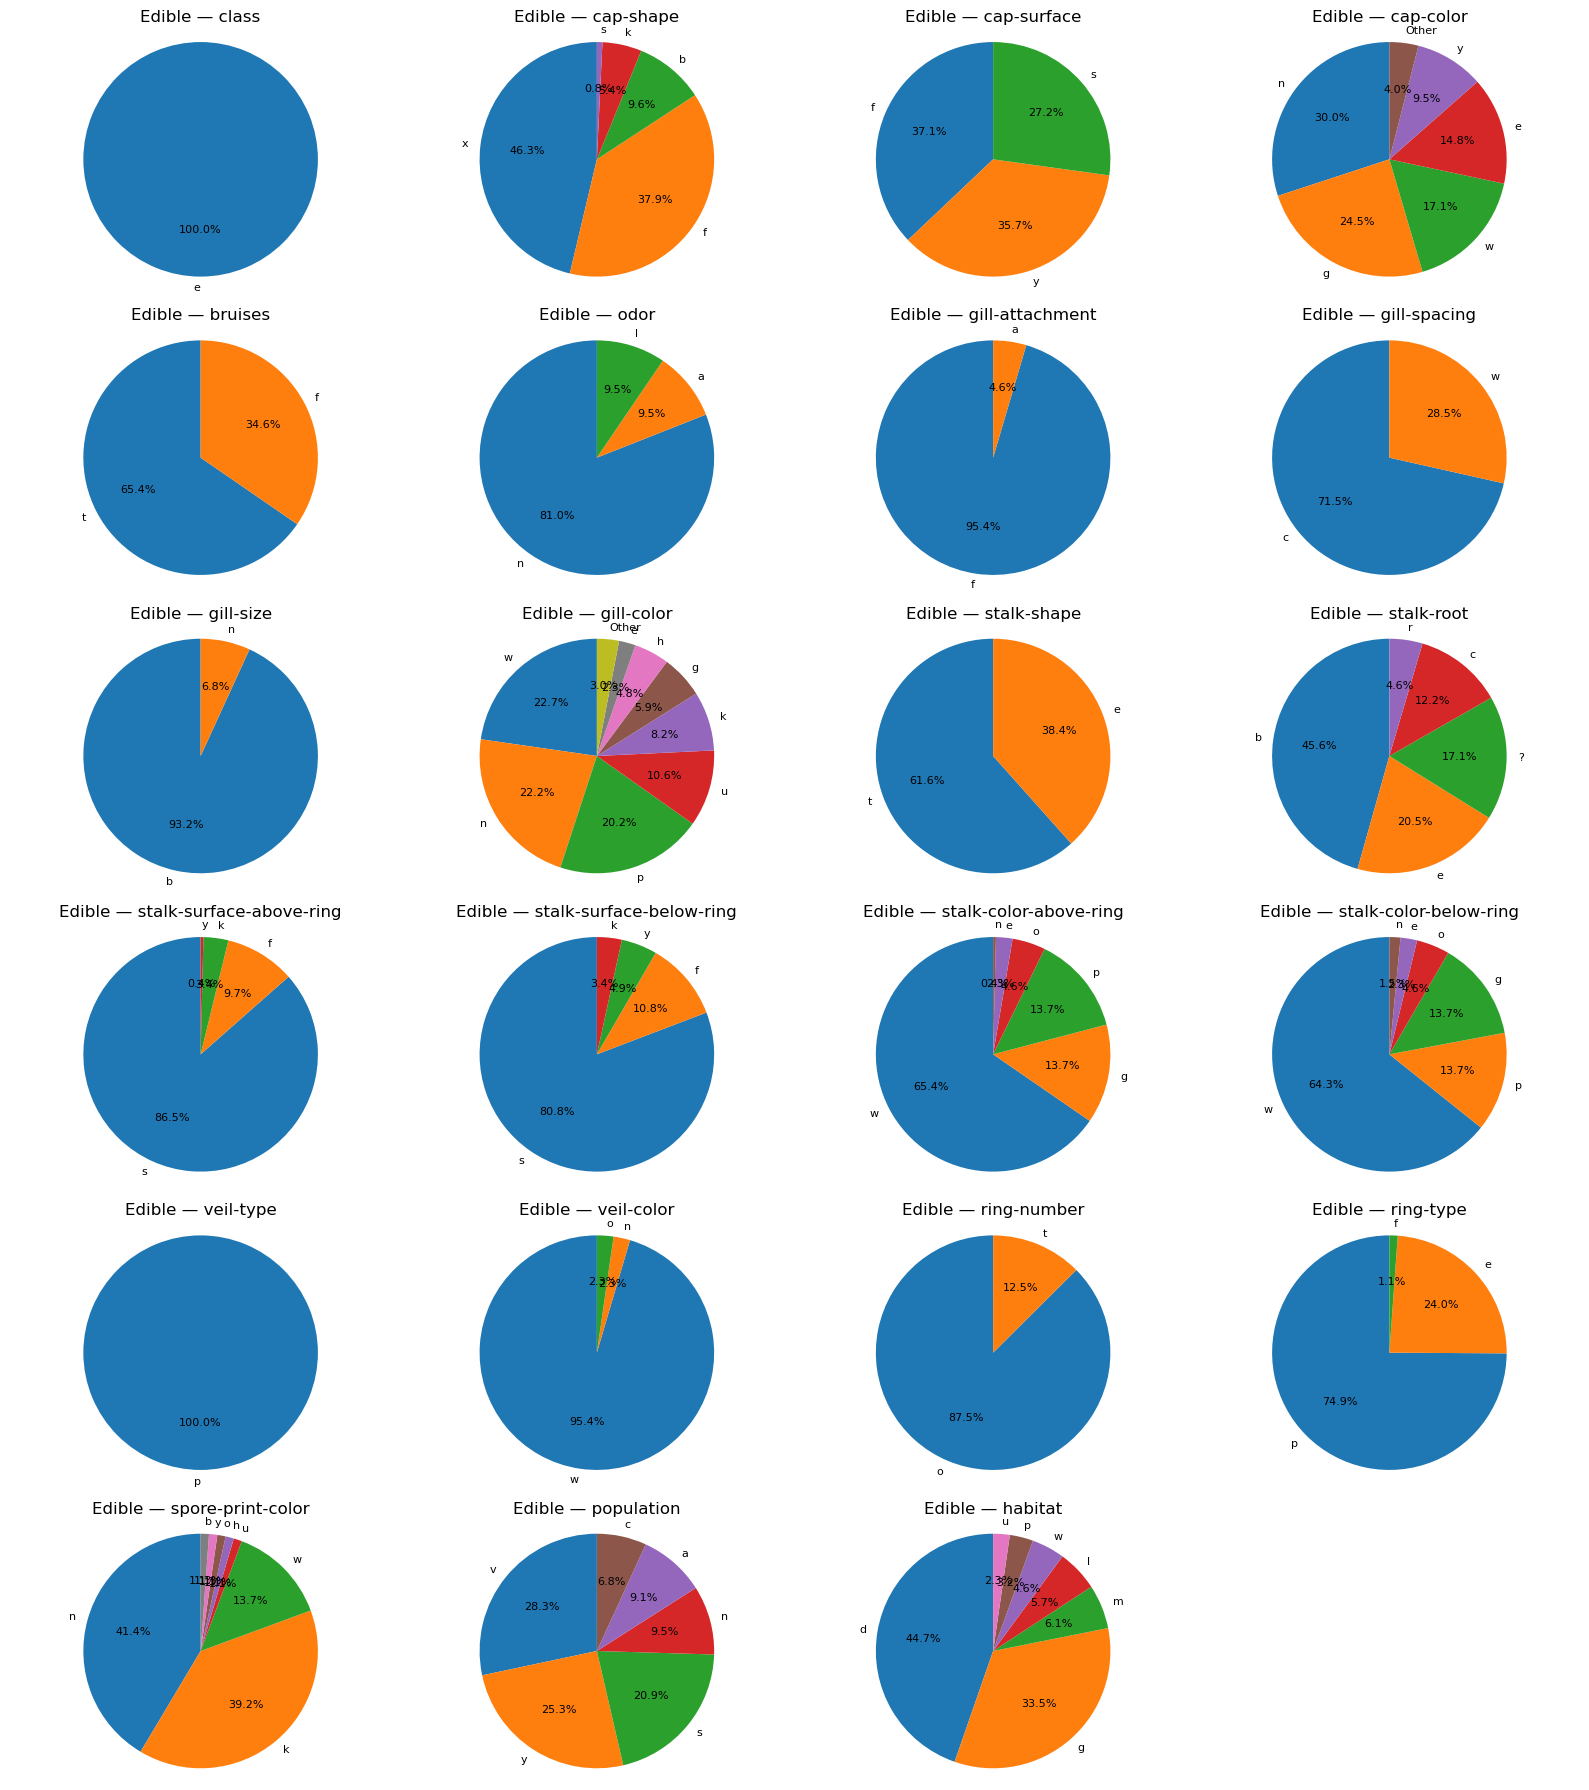

In [22]:
cols = edible.columns.tolist()
n = len(cols)
ncols = 4
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4, nrows * 3))
axes = axes.flatten()

for i, col in enumerate(cols):
    counts = edible[col].value_counts()
    # Aggregate very small slices into "Other" for readability
    if len(counts) > 8:
        thresh = 0.02 * counts.sum()
        small = counts[counts <= thresh]
        if not small.empty:
            counts = counts[counts > thresh].copy()
            counts['Other'] = small.sum()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize':8})
    axes[i].set_title(f"Edible — {col}")
    axes[i].axis('equal')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Apply One Hot Encoding to all collumns

In [23]:
from sklearn.preprocessing import OneHotEncoder

# First, separate features from target
X = data.drop('class', axis=1)  # Features
y = data['class']  # Target
#we make y boolean
y = y.map({'p': 1, 'e': 0})

# Apply OneHotEncoder only to features
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(X)

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(X.columns))

#print(encoded_df.head())
print(f"Original shape: {X.shape}, Encoded shape: {encoded_df.shape}")


Original shape: (8124, 22), Encoded shape: (8124, 117)


Check for correlation between variables

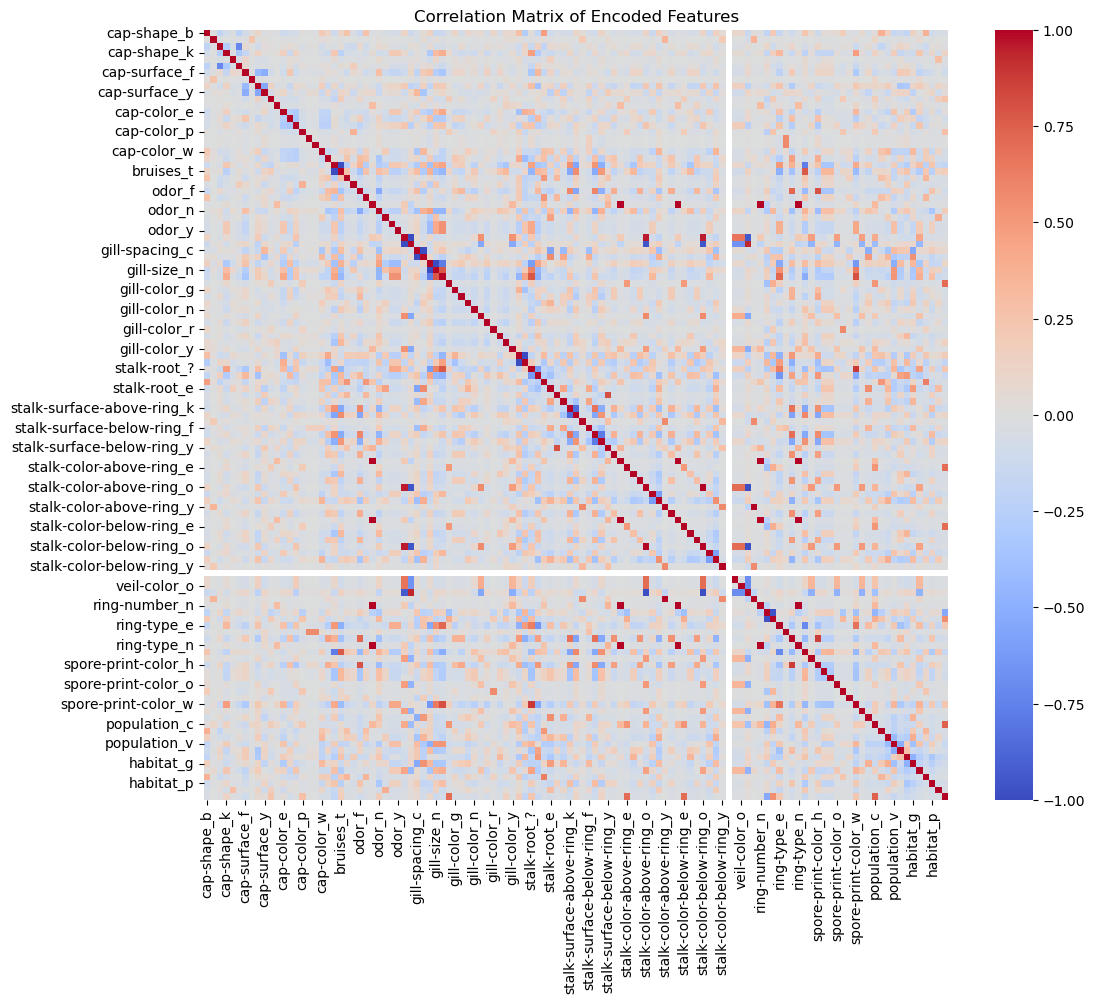

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = encoded_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Encoded Features')
plt.show()

Dropped 14 columns: ['bruises_t', 'gill-attachment_f', 'gill-spacing_w', 'gill-size_n', 'stalk-shape_t', 'stalk-color-above-ring_c', 'stalk-color-above-ring_o', 'stalk-color-below-ring_c', 'stalk-color-below-ring_o', 'veil-color_w', 'veil-color_y', 'ring-number_n', 'ring-number_t', 'ring-type_n']


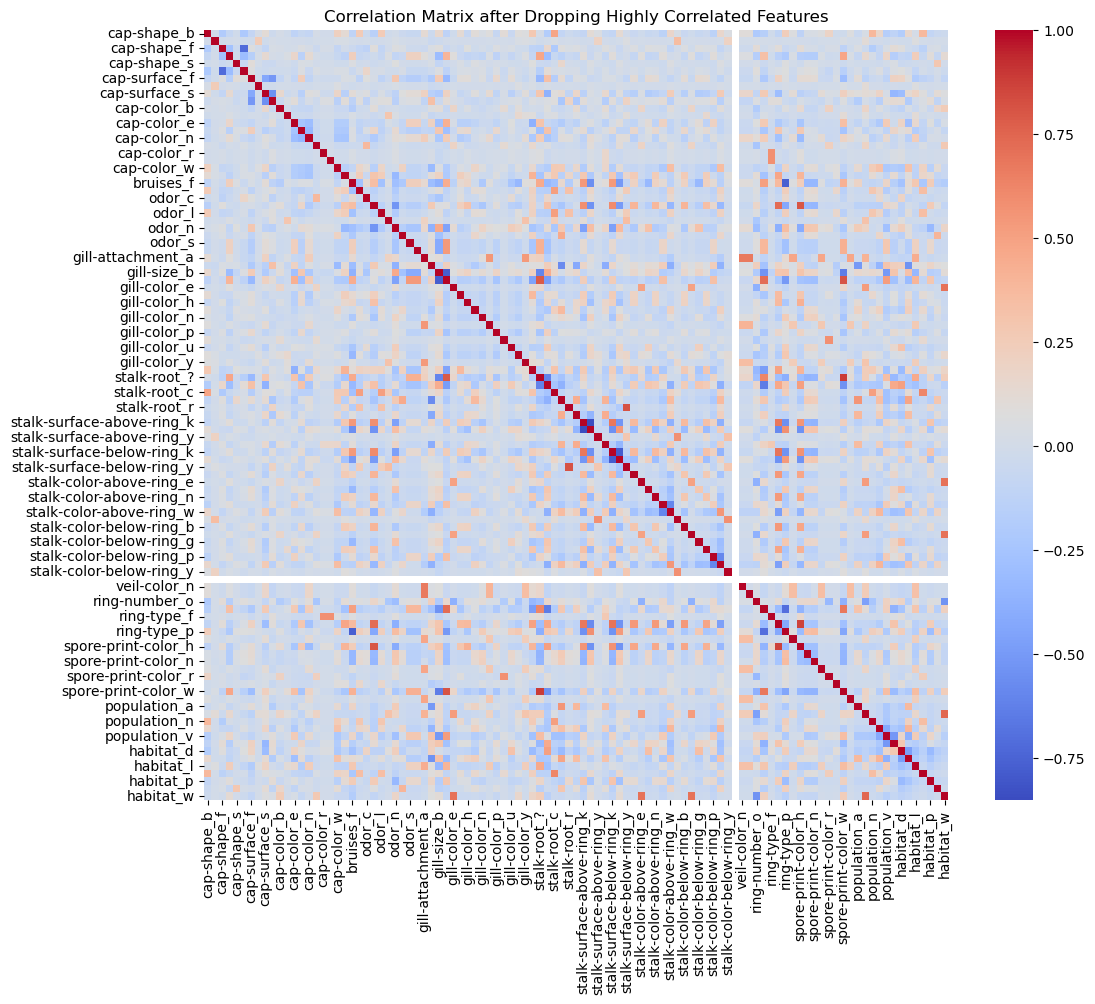

In [25]:
#If correlation is above 0.8, we can drop one of the columns
if correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates().iloc[1] > 0.8:
    # find highly correlated pairs (abs corr > 0.8) and drop one column from each pair
    corr_abs = correlation_matrix.abs()
    upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))
    to_drop = [col for col in upper.columns if (upper[col] > 0.9).any()]

    if to_drop:
        encoded_df.drop(columns=to_drop, inplace=True)
        print(f"Dropped {len(to_drop)} columns: {to_drop}")
        # recompute correlation matrix after dropping
        correlation_matrix = encoded_df.corr()
        plt.figure(figsize=(12,10))
        sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
        plt.title('Correlation Matrix after Dropping Highly Correlated Features')
        plt.show()
    else:
        print("No columns with abs(correlation) > 0.9 found.")

## Part I: Supervised Learning Using Gradient Boosting

Split the dataset into  Test and Train

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded_df, y, test_size=0.2, random_state=42)


Use Gradient Boosting Classifier to check if the mushrooms are posionous or eddible

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.4, max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")



Confusion Matrix:
[[843   0]
 [  0 782]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Accuracy: 1.0


Lets get the prediction metrics

In [28]:

from sklearn.tree import plot_tree

# Extract the first decision tree of the first stage
first_tree = model.estimators_[0, 0]




### Most significant Variables for the Model

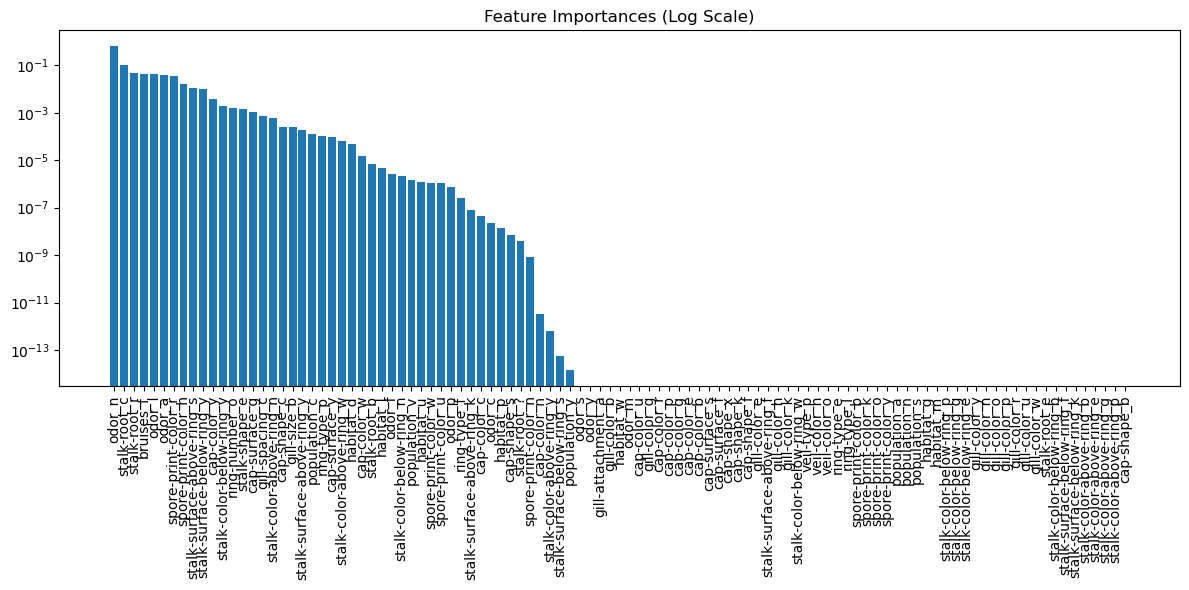

In [29]:
# plot the relevance of each feature
importances = model.feature_importances_
feature_names = encoded_df.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Log Scale)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)

#  Make Y-axis logarithmic
plt.yscale("log")

plt.tight_layout()
plt.show()


## Part II: Unsupervised Learning using K-Means


In [30]:
dfc=encoded_df

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(dfc)
labels = kmeans.labels_
#dfc['Cluster'] = labels
y_means=kmeans.predict(X_test)

print("K-Means Clustering Results:")
print(confusion_matrix(y_test, y_means))
print(classification_report(y_test, y_means))
print(f"Accuracy: {accuracy_score(y_test, y_means)}")



K-Means Clustering Results:
[[838   5]
 [169 613]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.91       843
           1       0.99      0.78      0.88       782

    accuracy                           0.89      1625
   macro avg       0.91      0.89      0.89      1625
weighted avg       0.91      0.89      0.89      1625

Accuracy: 0.8929230769230769
